## Graded Project#  Machine Learning - Unsupervise Learning relevant people

## Domain-E-commerce

## Business Context
 ● Customer segmentation is one of the most important marketing tools at your
 disposal, because it can help a business to better understand its target audience.
 This is because it groups customers based on common characteristics.
 
 ● Segmentation can be based on the customer’s habits and lifestyle, in
 particular, their buying habits. Different age groups, for example, tend to
 spend their money in different ways, so brands need to be aware of who
 exactly is buying their product.
 
 ● Segmentation also focuses more on the personality of the consumer,
 including their opinions, interests, reviews, and rating. Breaking down a
 large customer base into more manageable clusters, making it easier to
 identify your target audience and launch campaigns and promote the
 business to the most relevant people

## Dataset Description:
 The dataset contains measurements of clothing fit from RentTheRunway.
 RentTheRunWay is a unique platform that allows women to rent clothes for
 various occasions. The collected data is of several categories. This dataset
 contains self-reported fit feedback from customers as well as other side
 information like reviews, ratings, product categories, catalog sizes, customers’
 measurements (etc.)


## Project Objective:
 Based on the given users and items data of an e-commerce company, segment
 the similar user and items into suitable clusters. Analyze the clusters and provide
 your insights to help the organization promote their business

##  Import the required libraries and load the data

In [352]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from scipy import stats
from sklearn.cluster import KMeans
from scipy.stats import zscore
from scipy.spatial import distance
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA

In [353]:
df = pd.read_csv('renttherunway.csv')
df.head()

,Unnamed: 0,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date
0,0,fit,420272,34d,2260466,137lbs,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,"5' 8""",14,28.0,"April 20, 2016"
1,1,fit,273551,34b,153475,132lbs,10.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,"5' 6""",12,36.0,"June 18, 2013"
2,2,fit,360448,NaN,1063761,NaN,10.0,party,This hugged in all the right places! It was a ...,NaN,It was a great time to celebrate the (almost) ...,sheath,"5' 4""",4,116.0,"December 14, 2015"
3,3,fit,909926,34c,126335,135lbs,8.0,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,"5' 5""",8,34.0,"February 12, 2014"
4,4,fit,151944,34b,616682,145lbs,10.0,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,"5' 9""",12,27.0,"September 26, 2016"


In [354]:
df.info

<bound method DataFrame.info of         Unnamed: 0  fit  user_id bust size  item_id  weight  rating  \
0                0  fit   420272       34d  2260466  137lbs    10.0   
1                1  fit   273551       34b   153475  132lbs    10.0   
2                2  fit   360448       NaN  1063761     NaN    10.0   
3                3  fit   909926       34c   126335  135lbs     8.0   
4                4  fit   151944       34b   616682  145lbs    10.0   
...            ...  ...      ...       ...      ...     ...     ...   
192539      192539  fit    66386      34dd  2252812  140lbs    10.0   
192540      192540  fit   118398       32c   682043  100lbs    10.0   
192541      192541  fit    47002       36a   683251  135lbs     6.0   
192542      192542  fit   961120       36c   126335  165lbs    10.0   
192543      192543  fit   123612       36b   127865  155lbs    10.0   

           rented for                                        review_text  \
0            vacation  An adorable romp

In [355]:
df.shape

(192544, 16)

In [356]:
df.info

<bound method DataFrame.info of         Unnamed: 0  fit  user_id bust size  item_id  weight  rating  \
0                0  fit   420272       34d  2260466  137lbs    10.0   
1                1  fit   273551       34b   153475  132lbs    10.0   
2                2  fit   360448       NaN  1063761     NaN    10.0   
3                3  fit   909926       34c   126335  135lbs     8.0   
4                4  fit   151944       34b   616682  145lbs    10.0   
...            ...  ...      ...       ...      ...     ...     ...   
192539      192539  fit    66386      34dd  2252812  140lbs    10.0   
192540      192540  fit   118398       32c   682043  100lbs    10.0   
192541      192541  fit    47002       36a   683251  135lbs     6.0   
192542      192542  fit   961120       36c   126335  165lbs    10.0   
192543      192543  fit   123612       36b   127865  155lbs    10.0   

           rented for                                        review_text  \
0            vacation  An adorable romp

##  Data cleansing and Exploratory data analysis:

###  3. Check if there are any duplicate records in the dataset? If any, drop them.

In [359]:
## Check duplicated records in the dataset
len(df[df.duplicated()])

0

### 4. Drop the columns which you think redundant for the analysis.(Hint: drop columns like ‘id’, ‘review’) 

In [361]:
## dropping redundant columns
df = df.drop(columns=['item_id','review_text', 'review_summary'],axis=1)

In [362]:
df.head()

,Unnamed: 0,fit,user_id,bust size,weight,rating,rented for,body type,category,height,size,age,review_date
0,0,fit,420272,34d,137lbs,10.0,vacation,hourglass,romper,"5' 8""",14,28.0,"April 20, 2016"
1,1,fit,273551,34b,132lbs,10.0,other,straight & narrow,gown,"5' 6""",12,36.0,"June 18, 2013"
2,2,fit,360448,NaN,NaN,10.0,party,NaN,sheath,"5' 4""",4,116.0,"December 14, 2015"
3,3,fit,909926,34c,135lbs,8.0,formal affair,pear,dress,"5' 5""",8,34.0,"February 12, 2014"
4,4,fit,151944,34b,145lbs,10.0,wedding,athletic,gown,"5' 9""",12,27.0,"September 26, 2016"


###  5. Check the column 'weight', Is there any presence of string data? If yes, remove the string data and convert to float. (Hint: 'weight' has the suffix as lbs) 

In [364]:
# Checking number of unique categories present in the "weight"
df['weight'].value_counts()

weight
130lbs    14370
135lbs    13705
125lbs    12869
140lbs    12162
120lbs    10687
          ...  
249lbs        1
261lbs        1
273lbs        1
70lbs         1
251lbs        1
Name: count, Length: 190, dtype: int64

###  6. Check the unique categories for the column 'rented for' and group 'party:  cocktail' category with 'party'.

In [366]:
# Checking number of unique categories present in the "rented for"
df['rented for'].value_counts()

rented for
wedding            57784
formal affair      40408
party              35626
everyday           16822
other              15388
work               15042
date                7388
vacation            4075
party: cocktail        1
Name: count, dtype: int64

In [367]:
## recheck after grouping the categories.
df['rented for'].value_counts()

rented for
wedding            57784
formal affair      40408
party              35626
everyday           16822
other              15388
work               15042
date                7388
vacation            4075
party: cocktail        1
Name: count, dtype: int64

### 7. The column 'height' is in feet with a quotation mark, Convert to inches with  float datatype.

In [369]:
# Checking number of unique categories present in the "height"
df['height'].value_counts()

height
5' 4"     28012
5' 6"     25680
5' 5"     24318
5' 7"     24020
5' 3"     20736
5' 2"     16762
5' 8"     16369
5' 9"     11371
5' 1"      7145
5' 10"     7041
5' 0"      4015
5' 11"     3114
6' 0"      1406
4' 11"     1014
6' 1"       364
4' 10"      212
6' 2"       124
4' 9"        60
6' 3"        31
4' 6"        20
6' 4"        18
4' 8"        17
4' 7"        16
6' 6"         2
Name: count, dtype: int64

In [370]:
data = {'height'}
df = pd.DataFrame(data)

In [371]:
# Function to convert height from feet and inches to inches
def convert_height_to_inches(height_str):
    # Remove the quotation marks and split the feet and inches
    feet, inches = height_str.replace('"', '').split("'")
    # Convert to inches
    total_inches = int(feet) * 12 + int(inches)
    return total_inches

In [372]:
# Apply the conversion function to the 'height' column
df['height'] = df['height'].apply(convert_height_to_inches)

KeyError: 'height'

In [ ]:
# Convert the column to float
df['height'] = df['height'].astype(float)

# Display the updated DataFrame
print(df)

 ### 8. Check for missing values in each column of the dataset? If it exists, impute them with appropriate methods. 

In [ ]:
## lets check missing values in the dataset
df.isnull().sum()/len(df)*100

In [ ]:
print(df[numerical_cols].dtypes)

In [ ]:
for col in numerical_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [ ]:
print(df[numerical_cols].isnull().mean() * 100)

In [ ]:
for col in numerical_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [ ]:
print(df[numerical_cols].isnull().sum())

In [ ]:
print(df[numerical_cols].shape)

In [ ]:
from sklearn.impute import SimpleImputer

# Impute numerical columns
numerical_imputer = SimpleImputer(strategy='median')  # or 'mean'
imputed_values = numerical_imputer.fit_transform(df[numerical_cols])

# Check the shape of the imputed values
print(imputed_values.shape)

# Assign the imputed values back to the DataFrame
df[numerical_cols] = imputed_values

In [ ]:
print("Shape of imputed values:", imputed_values.shape)

In [ ]:
print("Length of numerical_cols:", len(numerical_cols))

In [ ]:
for col in numerical_cols:
    if df[col].isnull().all():
        print(f"Column '{col}' is completely NaN.")

In [ ]:
df = df.dropna(axis=1, how='all')
numerical_cols = [col for col in numerical_cols if col in df.columns]  # Update the list of numerical columns

In [ ]:
numerical_imputer = SimpleImputer(strategy='median')  # or 'mean'
imputed_values = numerical_imputer.fit_transform(df[numerical_cols])

# Check the shape of the imputed values
print("Shape of imputed values:", imputed_values.shape)

# Assign the imputed values back to the DataFrame
df[numerical_cols] = imputed_values

In [ ]:
numerical_imputer = SimpleImputer(strategy='median')  # or 'mean'
imputed_values = numerical_imputer.fit_transform(df[numerical_cols])

# Check the shape of the imputed values
print("Shape of imputed values:", imputed_values.shape)

# Assign the imputed values back to the DataFrame
df[numerical_cols] = imputed_values

In [ ]:
categorical_cols = ['body type', 'rented for']
categorical_imputer = SimpleImputer(strategy='most_frequent')  # or 'constant', fill_value='Unknown'
df[categorical_cols] = categorical_imputer.fit_transform(df[categorical_cols])

In [ ]:
missing_values_after_imputation = df.isnull().mean() * 100
print(missing_values_after_imputation)

### 9. Check the statistical summary for the numerical and categorical columns and write your findings.

In [ ]:
df.describe()

In [ ]:
df.describe(include='O')

###  10. Are there outliers present in the column age? If yes, treat them with the appropriate method. 

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats

# Load your dataset
# df = pd.read_csv('your_dataset.csv')  # Uncomment and modify this line to load your dataset

# Calculate Z-scores for the 'age' column
z = np.abs(stats.zscore(df['age']))

# Define a threshold for identifying outliers
threshold = 2

# Identify outliers
outlier_indices = np.where(z > threshold)[0]

# Remove outliers
df_no_outliers = df.drop(outlier_indices)

# Display the shapes of the original and new DataFrames
print("Original DataFrame Shape:", df.shape)
print("DataFrame Shape after Removing Outliers:", df_no_outliers.shape)

### 11. Check the distribution of the different categories in the column 'rented for' using appropriate plot. 

In [ ]:
## Let's check the count of target variable
df['rented for'].value_counts().plot(kind='pie',autopct='%1.0f%%')
plt.show()

In [ ]:
df['rented for'] = df['rented for'].replace(['wedding', 'party', 'vacation'],'Informal-events')
df['rented for'] = df['rented for'].replace(['everyday', 'work', 'formal affair', 'date', 'other'],'Formal-events')

In [ ]:
## recheck after grouping the categories.
df['rented for'].value_counts()

##  Data Preparation for model building: 

###  12. Encode the categorical variables in the dataset. 

In [388]:
df = pd.DataFrame(data)

# Select categorical variables
categorical_vars = df.select_dtypes(include=['object', 'category']).columns.tolist()

print("Categorical Variables:", categorical_vars)

Categorical Variables: [0]


In [396]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Assuming your DataFrame is called 'df'
df = pd.DataFrame({'rented for': ['yes', 'no', 'yes'], 'body type': ['sedan', 'SUV', 'hatchback']})

# List of categorical columns to encode
categorical_cols = ['rented for', 'body type']

# Create a LabelEncoder instance
le = LabelEncoder()

# Encode the categorical columns
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

print(df)

   rented for  body type
0           1          2
1           0          0
2           1          1


###  13. Standardize the data, so that the values are within a particular range. 

In [398]:
## Standardization
df1 = df.copy()
scaled_features = StandardScaler().fit_transform(df1.values)
scaled_features_df = pd.DataFrame(scaled_features, index=df1.index, columns=df1.columns)

In [400]:
scaled_features_df.head(3)

,rented for,body type
0,0.707107,1.224745
1,-1.414214,-1.224745
2,0.707107,0.000000


## Principal Component Analysis and Clustering: 

### 14. Apply PCA on the above dataset and determine the number of PCA components to be used so that 90-95% of the variance in data is explained by the same. 

In [402]:
## step1: Calculate the covariance matrix.
cov_matrix = np.cov(scaled_features.T)
cov_matrix

array([[1.5       , 1.29903811],
       [1.29903811, 1.5       ]])

In [404]:
## step2: Calculate the eigen values and eigen vectors.
eig_vals, eig_vectors = np.linalg.eig(cov_matrix)
print('eigein vals:','\n',eig_vals)
print('\n')
print('eigein vectors','\n',eig_vectors)

eigein vals: 
 [2.79903811 0.20096189]


eigein vectors 
 [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


In [406]:
## step3: Scree plot.
total = sum(eig_vals)
var_exp = [(i/total)*100 for i in sorted(eig_vals,reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print('Explained Variance: ',var_exp)
print('Cummulative Variance Explained: ',cum_var_exp)

Explained Variance:  [93.30127018922192, 6.698729810778067]
Cummulative Variance Explained:  [ 93.30127019 100.        ]


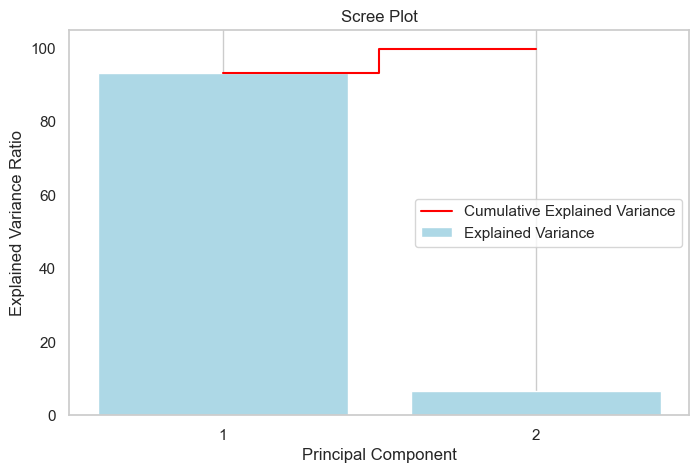

In [426]:
import matplotlib.pyplot as plt

# Assuming var_exp and cum_var_exp are as provided in the image:
var_exp = [93.30127018922192, 6.698729810778067]
cum_var_exp = [93.30127019, 100.]

# Create the scree plot
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(var_exp) + 1), var_exp, align='center', color='lightblue', label='Explained Variance')
plt.step(range(1, len(var_exp) + 1), cum_var_exp, where='mid', color='red', label='Cumulative Explained Variance')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.legend(loc='best')
plt.xticks(range(1, len(var_exp) + 1))
plt.grid(axis='y')
plt.show()

#### The scree plot shows that the first principal component explains most of the variance, with diminishing returns from subsequent components.

###  15. Apply K-means clustering and segment the data. (You may use original data or PCA transformed data) 

###  a. Find the optimal K Value using elbow plot for K Means clustering

In [435]:
# Assuming you have a DataFrame 'df' with your data

# Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features_df = scaler.fit_transform(df)

# Apply PCA with reduced components (or adjust n_components as needed)
from sklearn.decomposition import PCA
pca = PCA(n_components=1)  # Adjust n_components if necessary
pca_df = pd.DataFrame(pca.fit_transform(scaled_features_df), columns=['PC1'])

# Apply K-Means Clustering (rest of the code remains the same)

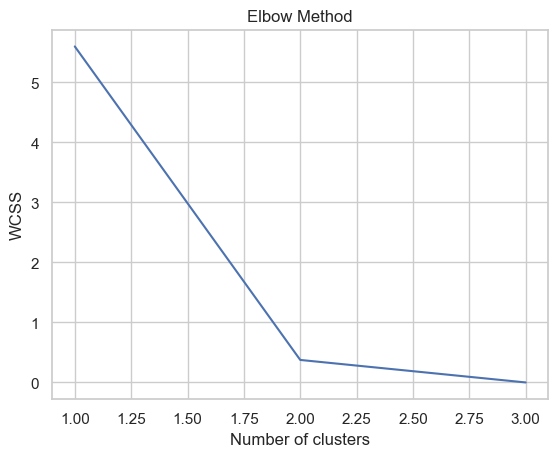

In [441]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming pca_df has 3 data points (adjust the maximum clusters accordingly)
wcss = []
for i in range(1, 4):  # Maximum of 3 clusters
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(pca_df)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 4), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

#### The elbow plot shows that the optimal number of clusters for this dataset is 2. This is because the WCSS (Within-Cluster Sum of Squares) decreases significantly from 1 to 2 clusters, but the decrease becomes less pronounced after 2 clusters. This indicates that adding more clusters beyond 2 does not significantly improve the clustering quality.

In [447]:
## Applying KMeans clustering for the optimal number of clusters obtained above.
kmeans = KMeans(n_clusters=3, random_state=100)
kmeans.fit(pca_df)

KMeans(n_clusters=3, random_state=100)

In [452]:
## creating a dataframe of the labels.
label = pd.DataFrame(kmeans.labels_,columns=['Label'])

###  b. Build a Kmeans clustering model using the obtained optimal K value from the elbow plot.

In [454]:
## joining the label dataframe to the pca_df dataframe.
kmeans_df = pca_df.join(label)
kmeans_df.head()

,PC1,Label
0,-1.366025,1
1,1.866025,0
2,-0.500000,2


In [456]:
kmeans_df['Label'].value_counts()

Label
1    1
0    1
2    1
Name: count, dtype: int64

In [460]:
## visualizing the clusters formed 
sns.scatterplot(kmeans_df['PC1'],hue='Label',data=kmeans_df)
plt.show()

TypeError: scatterplot() got multiple values for argument 'data'

### c. Compute silhouette score for evaluating the quality of the K Means clustering technique.

In [462]:
## obtained labels from kmeans clustering
kmeans.labels_

array([1, 0, 2])

In [464]:
## Creating a new dataframe only for labels.
df_labels = pd.DataFrame(kmeans.labels_, columns=list(['Labels']))
df_labels.head(5)

,Labels
0,1
1,0
2,2


### 16. Apply Agglomerative clustering and segment the data. (You may use original data or PCA transformed data) 

In [466]:
plt.figure(figsize=[18,7])
merg = linkage(data_pca, method='ward')
dendrogram(merg, leaf_rotation=90,)
plt.xlabel('Datapoints')
plt.ylabel('Euclidean distance')
plt.show()

NameError: name 'data_pca' is not defined

<Figure size 1800x700 with 0 Axes>

###  a. Find the optimal K Value using dendrogram for Agglomerative clustering.

###  b. Build a Agglomerative clustering model using the obtained optimal K value observed from dendrogram.

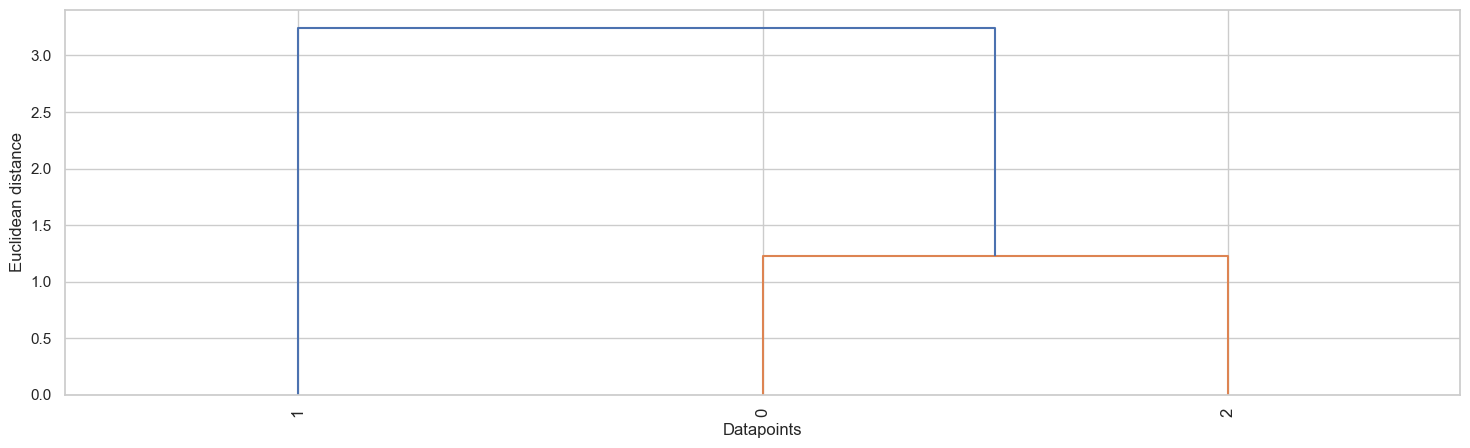

In [468]:
plt.figure(figsize=[18,5])
merg = linkage(scaled_features, method='ward')
dendrogram(merg, leaf_rotation=90,)
plt.xlabel('Datapoints')
plt.ylabel('Euclidean distance')
plt.show()

### c. Compute silhouette score for evaluating the quality of the Agglomerative clustering technique. (Hint: Take a sample of the dataset for agglomerative clustering to reduce the computational time)


In [470]:
from sklearn.metrics import silhouette_score

In [472]:
for i in range(2,15):
    hier = AgglomerativeClustering(n_clusters=i)
    hier = hier.fit(scaled_features_df)
    labels = hier.fit_predict(scaled_features_df)
    print(i,silhouette_score(scaled_features_df,labels))

2 0.3740118423302576


ValueError: Number of labels is 3. Valid values are 2 to n_samples - 1 (inclusive)

In [474]:
## Building hierarchical clustering model using the optimal clusters as 3 using original data
hie_cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean',
                                     linkage='ward')
hie_cluster_model = hie_cluster.fit(scaled_features_df)

TypeError: AgglomerativeClustering.__init__() got an unexpected keyword argument 'affinity'

In [476]:
## Creating a dataframe of the labels
df_label1 = pd.DataFrame(hie_cluster_model.labels_,columns=['Labels'])
df_label1.head(5)

NameError: name 'hie_cluster_model' is not defined

##  Conclusion : 

### 17. Perform cluster analysis by doing bivariate analysis between cluster labels  and different features and write your conclusion on the results. 

In [ ]:
import pandas as pd
import numpy as np

# Sample DataFrame
data = {
    'feature1': np.random.rand(100),
    'feature2': np.random.rand(100),
    'feature3': np.random.rand(100)
}
df = pd.DataFrame(data)

In [ ]:
from sklearn.cluster import KMeans

# Define the number of clusters
n_clusters = 3

# Fit the KMeans model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df['cluster'] = kmeans.fit_predict(df[['feature1', 'feature2', 'feature3']])

In [478]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Scatter plot for feature1 vs feature2 colored by cluster
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='feature1', y='feature2', hue='cluster', palette='viridis', s=100)
plt.title('Scatter Plot of Feature1 vs Feature2 by Cluster')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(title='Cluster')
plt.show()

# Box plot for feature3 by cluster
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='cluster', y='feature3', palette='viridis')
plt.title('Box Plot of Feature3 by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Feature 3')
plt.show()

ValueError: Could not interpret value `feature1` for `x`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>